<a href="https://colab.research.google.com/github/Sinchiguano/chicagoUniversity/blob/main/Lecture_1b_Data_Exploration_again1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we will explore the basics of Pandas with an example dataset from the Chicago Data Portal at https://data.cityofchicago.org. You should take some time to explore the portal and find your own datasets of interest to explore!

In [ ]:
import pandas as pd


# LINK FOR THE DATASET
# https://data.cityofchicago.org/Transportation/CTA-Ridership-L-Station-Entries-Daily-Totals/5neh-572f
# from google.colab import files
# import io


#IMPORTING THE FILE FROM MY GITHUT PERSONAL ACCOUNT
url = 'https://raw.githubusercontent.com/Sinchiguano/chicagoUniversity/main/Station_Entries_Daily_Totals.csv'
df = pd.read_csv(url)

BASIC EXPLORATIONS

In [ ]:
print(df.head(15))

# Weekday W
# Holidays A
# Weekends U

    station_id               stationname        date daytype  rides
0        41280            Jefferson Park  12/22/2017       W   6104
1        41000          Cermak-Chinatown  12/18/2017       W   3636
2        40280              Central-Lake  12/02/2017       A   1270
3        40140           Dempster-Skokie  12/19/2017       W   1759
4        40690                  Dempster  12/03/2017       U    499
5        41660                Lake/State  12/30/2017       A   8615
6        40180      Oak Park-Forest Park  12/17/2017       U    442
7        40250  Kedzie-Homan-Forest Park  12/02/2017       A   1353
8        40120               35th/Archer  12/07/2017       W   3353
9        41420        Addison-North Main  12/19/2017       W   6034
10       40270                      Main  12/16/2017       A    887
11       41450             Chicago/State  12/27/2017       W   9639
12       41210                Wellington  12/07/2017       W   3210
13       40010        Austin-Forest Park  12/03/

In [ ]:
print(df.shape)

(1158456, 5)


In [ ]:
print(df.describe())
# Some basic statistics: There is a station with no rides (minimum is zero!).
# Also, the station with the maximum number of rides appears to be about 10x the mean and median.
#                                                          Let's have a look at what those stations are.


         station_id         rides
count  1.158456e+06  1.158456e+06
mean   4.076671e+04  3.041143e+03
std    4.491984e+02  3.108889e+03
min    4.001000e+04  0.000000e+00
25%    4.037000e+04  9.570000e+02
50%    4.076000e+04  1.990000e+03
75%    4.115000e+04  4.004000e+03
max    4.170000e+04  3.632300e+04


In [ ]:
print(df['stationname'].value_counts())

Racine                    8145
Montrose-Brown            8143
Western-Forest Park       8142
Monroe/Dearborn           8142
Montrose-O'Hare           8141
                          ... 
Morgan-Lake               3987
Cermak-McCormick Place    3012
Washington/State          2953
Washington/Wabash         2069
Homan                       31
Name: stationname, Length: 148, dtype: int64


Selection Based on Conditionals

Let's see which stations have the most and fewest rides, overall, and for particular types of days.


In [ ]:
# Station with the most rides
mostRides=max(df['rides'])
print(mostRides)
print(type(mostRides))
print(df[df['rides']==mostRides])

36323
<class 'int'>
        station_id         stationname        date daytype  rides
912644       41320  Belmont-North Main  06/28/2015       U  36323


Station with the Least Rides

In [ ]:
leastRides=min(df['rides'])
print(leastRides)
print(type(leastRides))
print('--------------')
# print(df[df['rides']==leastRides])
print(df[df['rides']==leastRides].shape)

print('--------------')
print(df[df['rides']==leastRides].head(5))
# print(df[df['rides']==0].shape)

0
<class 'int'>
--------------
(13610, 5)
--------------
     station_id      stationname        date daytype  rides
23        40200  Randolph/Wabash  12/25/2017       U      0
110       40640   Madison/Wabash  12/05/2017       W      0
333       40640   Madison/Wabash  12/03/2017       U      0
354       40640   Madison/Wabash  12/11/2017       W      0
423       40640   Madison/Wabash  12/30/2017       A      0


Looks like a lot of weekends and holidays. We can group by columns and types to get a better understanding of what might be going on. We can count how many dates a station had zero rides in the dataset and sort these in descending order.


In [ ]:
zero = df[df['rides'] == 0]
zerogroup = zero.groupby(['stationname','daytype']).count()
newDf=zerogroup.sort_values(by=['date'],ascending=False)
print(newDf.head(5))

                          station_id  date  rides
stationname      daytype                         
Madison/Wabash   W               711   711    711
Washington/State W               516   516    516
Berwyn           W               504   504    504
Lawrence         W               504   504    504
Skokie           U               390   390    390


In [ ]:
import numpy as np

In [ ]:
a=np.random.randint(12,size=(3,4))
print(a)

[[ 3  1  5  1]
 [ 0  6  9 11]
 [ 6  2  5  4]]


In [ ]:
# for row in a:
#   print(row)
# aT=a.T
# print(aT)

tmp=[[row[i] for row in a] for i in range(4)]
print(tmp)
b=np.array(tmp)
print(b)
print(b.shape)
print(type(b))

[[3, 0, 6], [1, 6, 2], [5, 9, 5], [1, 11, 4]]
[[ 3  0  6]
 [ 1  6  2]
 [ 5  9  5]
 [ 1 11  4]]
(4, 3)
<class 'numpy.ndarray'>


In [ ]:
# print(df['rides'].head(15))
# print(df.head(15))
dfZero=df[df['rides']==0]
# print(dfZero.shape)
print('')
print('---------------')
dfGroup=dfZero.groupby(['stationname','daytype']).count()
print('')
print('---------------')
# print(dfGroup)
dfGroupOrd=dfGroup.sort_values(by='rides',ascending=False)
print('')
print('---------------')
print(dfGroupOrd)


---------------

---------------

---------------
                          station_id  date  rides
stationname      daytype                         
Madison/Wabash   W               711   711    711
Washington/State W               516   516    516
Berwyn           W               504   504    504
Lawrence         W               504   504    504
Skokie           U               390   390    390
...                              ...   ...    ...
Addison-O'Hare   A                 1     1      1
Ashland-Lake     W                 1     1      1
51st             U                 1     1      1
                 A                 1     1      1
Indiana          U                 1     1      1

[262 rows x 3 columns]


In [ ]:
# Exploring Temporal Patterns
# First, let's figure out the date range that we're dealing with.

print(df.head(10))

minValue=min(df['date'])
maxValue=max(df['date'])
print('')
print('-------------------')
print(f'Low Value: {minValue}')
print(f'High Value: {maxValue}')

   station_id               stationname        date daytype  rides
0       41280            Jefferson Park  12/22/2017       W   6104
1       41000          Cermak-Chinatown  12/18/2017       W   3636
2       40280              Central-Lake  12/02/2017       A   1270
3       40140           Dempster-Skokie  12/19/2017       W   1759
4       40690                  Dempster  12/03/2017       U    499
5       41660                Lake/State  12/30/2017       A   8615
6       40180      Oak Park-Forest Park  12/17/2017       U    442
7       40250  Kedzie-Homan-Forest Park  12/02/2017       A   1353
8       40120               35th/Archer  12/07/2017       W   3353
9       41420        Addison-North Main  12/19/2017       W   6034

-------------------
Low Value: 01/01/2001
High Value: 12/31/2022


In [ ]:
# Create a Time Index
# So we have all rides from January 1, 2001 to December 31, 2019.
#  Let's do some statistics that group ride statistics by date.
# First we need to tell Pandas that the date column is in fact a date.
#  So, we convert the column to a proper 'DateTime' type, and then set the index to this column.


print(df.info())
df['date']=pd.to_datetime(df['date'])
print()
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158456 entries, 0 to 1158455
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   station_id   1158456 non-null  int64 
 1   stationname  1158456 non-null  object
 2   date         1158456 non-null  object
 3   daytype      1158456 non-null  object
 4   rides        1158456 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 44.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158456 entries, 0 to 1158455
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   station_id   1158456 non-null  int64         
 1   stationname  1158456 non-null  object        
 2   date         1158456 non-null  datetime64[ns]
 3   daytype      1158456 non-null  object        
 4   rides        1158456 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 

In [ ]:
print(df.head(5))

df.set_index('date',inplace=True)


print('')


print(df.head(5))

# Let's see what this does to our data. Now we can see that the date column is indexed, but the rows are not sorted.





   station_id       stationname       date daytype  rides
0       41280    Jefferson Park 2017-12-22       W   6104
1       41000  Cermak-Chinatown 2017-12-18       W   3636
2       40280      Central-Lake 2017-12-02       A   1270
3       40140   Dempster-Skokie 2017-12-19       W   1759
4       40690          Dempster 2017-12-03       U    499

            station_id       stationname daytype  rides
date                                                   
2017-12-22       41280    Jefferson Park       W   6104
2017-12-18       41000  Cermak-Chinatown       W   3636
2017-12-02       40280      Central-Lake       A   1270
2017-12-19       40140   Dempster-Skokie       W   1759
2017-12-03       40690          Dempster       U    499


In [ ]:
#SORT THE DATAFRAME BY DATE
ridesByDate=df.sort_values(by='date')
print(ridesByDate.head(10))


            station_id              stationname daytype  rides
date                                                          
2001-01-01       40990                     69th       U   2366
2001-01-01       40980       Harlem-Forest Park       U    173
2001-01-01       40810           Medical Center       U    479
2001-01-01       40470                   Racine       U    286
2001-01-01       40790          Monroe/Dearborn       U    342
2001-01-01       40880                Thorndale       U    953
2001-01-01       41010                 Rockwell       U    209
2001-01-01       41480            Western-Brown       U    715
2001-01-01       41200                   Argyle       U    993
2001-01-01       40720  East 63rd-Cottage Grove       U    391


In [ ]:
#SANITY CHECKING
# Looks good! Now let's have a quick look at data for specific stations:
# the Garfield station at the Red Line and the Green lines, respectively.


mask=ridesByDate['stationname']=='Garfield-Dan Ryan'
print(type(ridesByDate))
print(mask.head(10))
print(type(mask))
garfieldStation=ridesByDate[mask]
print(type(garfieldStation))
print()
print(garfieldStation.head(5))
print(f'garfieldStation: {garfieldStation.shape}')

<class 'pandas.core.frame.DataFrame'>
date
2001-01-01    False
2001-01-01    False
2001-01-01    False
2001-01-01    False
2001-01-01    False
2001-01-01    False
2001-01-01    False
2001-01-01    False
2001-01-01    False
2001-01-01    False
Name: stationname, dtype: bool
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>

            station_id        stationname daytype  rides
date                                                    
2001-01-01       41170  Garfield-Dan Ryan       U   1457
2001-01-02       41170  Garfield-Dan Ryan       W   3748
2001-01-03       41170  Garfield-Dan Ryan       W   3977
2001-01-04       41170  Garfield-Dan Ryan       W   4185
2001-01-05       41170  Garfield-Dan Ryan       W   4533
garfieldStation: (8095, 4)


In [ ]:
filter=ridesByDate['stationname']=='Garfield-South Elevated'
garfieldSouth=ridesByDate[filter]
print(garfieldSouth.head(5))
print(f'garfieldSouth.shape: {garfieldSouth.shape}')

            station_id              stationname daytype  rides
date                                                          
2001-01-01       40510  Garfield-South Elevated       U    248
2001-01-02       40510  Garfield-South Elevated       W    617
2001-01-03       40510  Garfield-South Elevated       W    657
2001-01-04       40510  Garfield-South Elevated       W    697
2001-01-05       40510  Garfield-South Elevated       W    770
garfieldSouth.shape: (8125, 4)


<Axes: xlabel='date'>

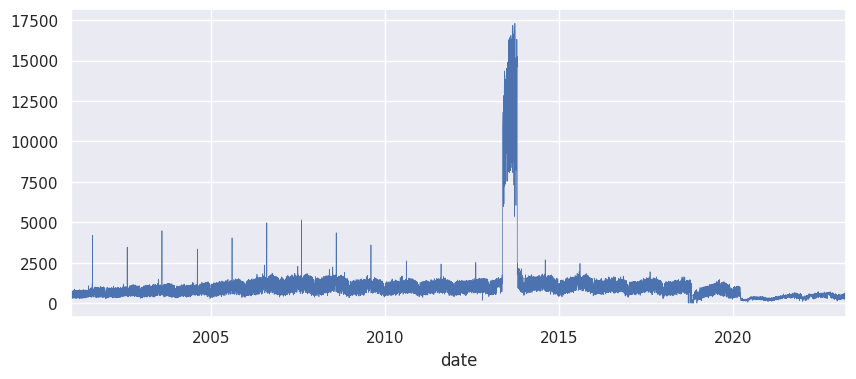

In [ ]:
# Visualizing Timeseries Data

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(10,4)})
garfieldSouth['rides'].plot(linewidth=0.5)


<Axes: xlabel='date'>

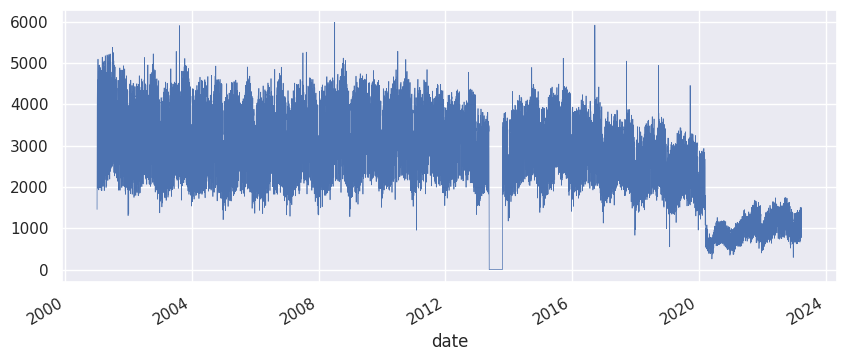

In [ ]:
# sns.set(rc={'figure.figsize':(10,4)})
garfieldStation['rides'].plot(linewidth=0.5)

<Axes: xlabel='date'>

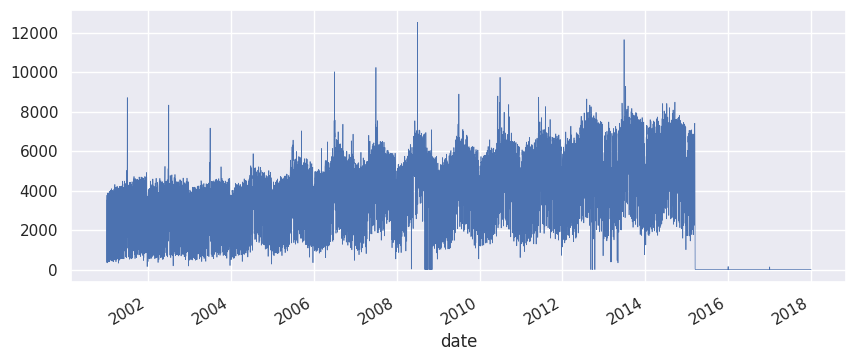

In [ ]:
ridesByDate[ridesByDate['stationname']=='Madison/Wabash']['rides'].plot(linewidth=0.5)